# Linear Regression with Gradient Descent

[Kevin McGuinness](http://www.eeng.dcu.ie/~mcguinne/), School of Electronic Engineering, Dublin City University

---

This notebook illustrates how to implement linear regression (least squares) using the gradient descent algorithm.

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 1. Generate some data

We start off by generating some data that will be used to fit our model. To do this, we uniformally sample $x$ from 0 to 1 and then generate $y$ from $x$ using a fixed linear transform:
$$
y = 2.5 x + 3
$$
and add some Gaussian noise.

In [ ]:
np.random.seed(42)

In [ ]:
def generate_data(n=100):
    xs = np.random.rand(n)
    ys = 2.5 * xs + 3.0 + np.random.randn(n) * 0.2
    return xs[:, np.newaxis], ys

Text(0,0.5,'y')

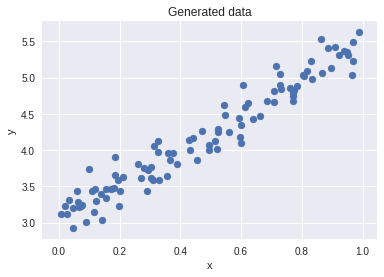

In [ ]:
X, y = generate_data(100)
scatter(X.ravel(), y)
title('Generated data')
xlabel('x')
ylabel('y')

## 2. Define the model, loss, and gradient

The model is a linear function:
$$
f(x, w, b) = w^T x + b
$$

We use square (Euclidean) loss:
$$
\mathcal{L}(w, b) = \frac{1}{2N} \sum_{i=1}^{N} (f(x_i) - y_i)^2
$$

The gradient of $\mathcal{L}$ wrt. $w$ is:
$$
\Delta_w \mathcal{L}(w, b) = \frac{1}{N} \sum_{i=1}^{N} (f(x_i) - y_i) x_i
$$

The partial derivative wrt. the bias is:
$$
\Delta_b \mathcal{L}(w, b) = \frac{1}{N} \sum_{i=1}^{N} (f(x_i) - y_i) 
$$

We implement some functions below to capture these equations.

In [ ]:
def predict(X, w, b):
    """
    Linear prediction function.
    """
    return np.dot(X, w) + b

def mean_square_error(p, y):
    """
    Compute the mean squared error between the predictions and the target.
    """
    return 0.5 * np.mean((p-y)**2)

def loss(X, y, w, b):
    """
    Predict using the model and compute the loss.
    """
    p = predict(X, w, b)
    return mean_square_error(p, y)

def d_loss(X, y, w, b):
    """
    Returns a pair (dw, db) which contain the derivative of the loss
    with respect to the parameters (w, b).
    """
    y = y.ravel()
    p = predict(X, w, b)
    dw = ((p - y)[:, np.newaxis] * X).mean(axis=0)
    db = (p - y).mean()
    return dw, db

## 3. Gradient descent

We now implement the gradient descent algorithm. The algorithm starts off with an initial guess of zero for the slope ($w$ vector) and one for the bias. It then iterates the updates: $$ w \leftarrow w - \alpha\nabla_w \mathcal{L}(w, b) \\ b \leftarrow b - \alpha \nabla_b \mathcal{L}(w, b)$$ for a fixed number of iterations. Each iteration reduces the loss, provided the learning rate $\alpha$ is sufficiently small.

The function returns the final $w, b$ parameters as well as a trace of the losses.

In [ ]:
def gradient_descent_optimize(X, y, loss, d_loss, lr=1e-3, epochs=2000, verbose=True):
    
    # initialize weights and bias
    w = np.zeros(X.shape[1]) 
    b = 1
    
    # set the initial learning rate
    alpha = lr
    
    # save learning curves to losses
    losses = []
    
    for i in range(epochs):
        
        # compute loss
        L = loss(X, y, w, b)
        
        # print loss
        if i % 10 == 0 and verbose:
            print('Epoch {} Loss: {}'.format(i, L))
            
        # compute gradient of loss wrt parameters
        dw, db = d_loss(X, y, w, b)
        
        # update parameters
        w = w - alpha * dw
        b = b - alpha * db
        
        # save loss
        losses.append(L)
        
    return w, b, losses

Now we run gradient descent for 500 iterations with a learning rate of 0.1 and plot the loss versus iteration.

Epoch 0 Loss: 5.311218476998567
Epoch 10 Loss: 0.43524081653096097
Epoch 20 Loss: 0.08271786763345394
Epoch 30 Loss: 0.05276786976619552
Epoch 40 Loss: 0.046412735888589206
Epoch 50 Loss: 0.042295715830569625
Epoch 60 Loss: 0.038823261501268504
Epoch 70 Loss: 0.03581772561706673
Epoch 80 Loss: 0.033210709135737454
Epoch 90 Loss: 0.030948969859608374
Epoch 100 Loss: 0.028986750255929297
Epoch 110 Loss: 0.027284383232693582
Epoch 120 Loss: 0.025807456919540794
Epoch 130 Loss: 0.02452611669021191
Epoch 140 Loss: 0.023414461511647007
Epoch 150 Loss: 0.02245002036806099
Epoch 160 Loss: 0.021613298030612436
Epoch 170 Loss: 0.020887380980472412
Epoch 180 Loss: 0.020257595518677694
Epoch 190 Loss: 0.019711211151742805
Epoch 200 Loss: 0.01923718325725936
Epoch 210 Loss: 0.018825929827720456
Epoch 220 Loss: 0.018469137779666404
Epoch 230 Loss: 0.018159594912881463
Epoch 240 Loss: 0.017891044122862382
Epoch 250 Loss: 0.01765805691960701
Epoch 260 Loss: 0.017455923696029826
Epoch 270 Loss: 0.01728

Text(0,0.5,'loss')

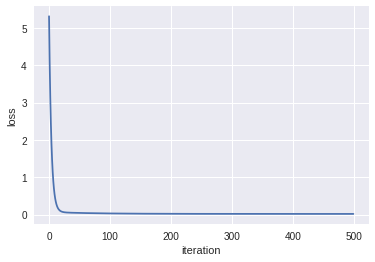

In [ ]:
w, b, losses = gradient_descent_optimize(X, y, loss, d_loss, lr=0.1, epochs=500)
plot(losses)
xlabel('iteration')
ylabel('loss')

The parameters found by gradient descent are:

In [ ]:
print('Paramaters:', w, b)

Paramaters: [2.37666051] 3.0588997501304083


Since we generated the data synthetically we know the true values of $w$ and $b$ are 2.5 and 3. So the gradient descent estimate is not far off!

Let's see how this compares with the exact least squares estimate:

In [ ]:
X_augmented = np.hstack([X, np.ones(X.shape)])
w_lstsq, b_lstsq = lstsq(X_augmented, y.T, rcond=None)[0]
print('Exact least squares estimate,  w =', w_lstsq, ' b =', b_lstsq)

Exact least squares estimate,  w = 2.4080453545753953  b = 3.0430192315093483


Pretty close!

## 4. Plot the regression line

Scatter plot the data and overlay the regression line fit using gradient descent

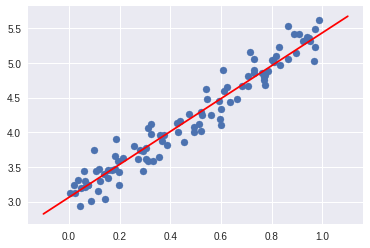

In [ ]:
scatter(X.ravel(), y)

def plotline(w, b, x0, x1):
    y0 = w * x0 + b
    y1 = w * x1 + b
    xs = linspace(x0, x1, 100)
    ys = linspace(y0, y1, 100)
    plot(xs, ys, 'r')
    
plotline(w, b, -0.1, 1.1)

## Exercise

Note that while we only look at univariate regression here (1D input), the above gradient descent code works for multiple variables too (N-D input).

Try generate some 2D inputs using a similar method to the above and run gradient descent on these. Then extend this to 3D inputs

In [ ]:
X = np.random.rand(100, 2)
w_true = np.array([2.5, 4.5])
b_true = 6.0
y = # <<- insert code here!

In [ ]:
w, b, losses = gradient_descent_optimize(X, y, loss, d_loss, lr=0.1, epochs=500, verbose=False)
print(w, b)